In [201]:
import pandas as pd
from common import SubnetworkType
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from PIL import Image

## Investigating node2vec params

In [ ]:
# path = "/Users/Ryan/Projects/775-project/data/simulated_data_results/rep10/sim_gt-cluster_subnetworksize-10_numsamples-50/node2vec_param_trials_permutation_test_stats.tsv"
# df = pd.read_csv(path, sep="\t", index_col=0)
# display(df["topological_dissimilarity_node2vec_p_4_q_4"])
# display(df["topological_dissimilarity_node2vec_p_4_q_0.25"].value_counts())


# path = "/Users/Ryan/Projects/775-project/data/simulated_data_results/rep8/sim_gt-cluster_subnetworksize-10_numsamples-50/permutation_test_stats.tsv"
# df = pd.read_csv(path, sep="\t", index_col=0)
# display(df["topological_dissimilarity_basic"].value_counts())

In [245]:
subnetwork_types = [
    SubnetworkType.SCALE_FREE.name,
    SubnetworkType.CLUSTER.name,  # TODO: add in the others when the permutation tests finish
]

for subnetwork_type in subnetwork_types:
    results_folder = f"../data/simulated_data_results/comparing_node2vec_params/sim_gt-{subnetwork_type}_subnetworksize-10_numsamples-50"
    node2vec_trial_path = f"{results_folder}/node2vec_param_trial_results.tsv"
    node2vec_trial_results = pd.read_csv(node2vec_trial_path, sep="\t", index_col=0)
    p_q_node2vec_params = [
        (1, 1, 5),
        (1, 1, 10),
        (1, 1, 15),
        (1, 2, 10),
        (1, 0.5, 10),
        (2, 1, 10),
        (2, 2, 10),
        (2, 0.5, 10),
        (0.5, 1, 10),
        (0.5, 2, 10),
        (0.5, 0.5, 10),
    ]

    metrics = node2vec_trial_results.columns

    # Subset to node2vec related results
    node2vec_trial_results = node2vec_trial_results[
        node2vec_trial_results.index.str.contains("node2vec", na=False)
    ]

    # Parse p, q, n_neighbors and method from index
    extracted_info = node2vec_trial_results.index.str.extract(
        r"^(.*?)_p_([\d\.]+)_q_([\d\.]+)_m_([\d\.]+)$"
    )
    extracted_info.index = node2vec_trial_results.index
    node2vec_trial_results[["method", "p", "q", "m"]] = extracted_info

    methods = node2vec_trial_results["method"].unique()
    metrics = list(node2vec_trial_results.columns)[4:]

    # Plot metrics to compare the node2vec parameters
    for method in methods:
        method_name = method
        if method == "cidrgn1_node2vec":
            method_name = "CIdrgn.N2V.1"
        elif method == "cidrgn2_node2vec":
            method_name = "CIdrgn.N2V.2"
        elif method == "topological_dissimilarity_node2vec":
            method_name = "TOP_DIS.N2V"

        plot_data = node2vec_trial_results[node2vec_trial_results["method"] == method]
        plot_data = plot_data.melt(
            id_vars=["p", "q", "m", "method"],
            var_name="metric",
            value_name="value",
        )
        plot_data["p"] = plot_data["p"].astype(float)
        plot_data["q"] = plot_data["q"].astype(float)
        plot_data["m"] = plot_data["m"].astype(int)

        # Plot specific metrics
        plot_data = plot_data[plot_data["metric"].isin(metrics)]

        for i in range(2):
            if i == 0:
                # Show varying m
                plot_data_subset = plot_data[
                    (plot_data["p"] == 1) & (plot_data["q"] == 1)
                ]
                plt.figure(figsize=(6, 4))
                plot_data_subset["assignment"] = (
                    "m="
                    + plot_data_subset["m"].astype(str)
                )
                params = "m"

            else:
                # Show varying p, q
                plot_data_subset = plot_data[plot_data["m"] == 10]
                plt.figure(figsize=(8, 6))
                plot_data_subset["assignment"] = (
                    "p="
                    + plot_data_subset["p"].astype(str)
                    + ", q="
                    + plot_data_subset["q"].astype(str))
                params = "p_q"

            sns.barplot(
                data=plot_data_subset,
                x="metric",
                y="value",
                hue="assignment",
                palette="Paired",
            )
            plt.title(f"{method_name} ({subnetwork_type.lower()} subnetworks)", fontsize=18)
            plt.xlabel("Metric", fontsize=16)
            plt.ylabel("Value", fontsize=16)
            plt.xticks(rotation=45, fontsize=14)
            plt.tight_layout()
            # plt.legend(
            #     title="", fontsize=14, loc="lower right", bbox_to_anchor=(2, 0.5)
            # )
            plt.legend([], [], frameon=False) # No legend
            handles, labels = plt.gca().get_legend_handles_labels()
            plt.savefig(
                f"../data/plots/node2vec_params_{method}_{subnetwork_type}_{params}.png",
                format="png",
                dpi=300,
                bbox_inches="tight",
            )
            # plt.show()
            plt.close()

            legend_fig = plt.figure(figsize=(2, 1))
            legend_ax = legend_fig.add_subplot(111)
            legend_ax.axis("off")  # Remove axes
            legend = legend_ax.legend(
                handles,
                labels,
                loc="center",
                title="",
                fontsize=14,
                title_fontsize=16,
                frameon=False,
                ncol = 3
            )
            legend_fig.savefig(
                f"../data/plots/node2vec_params_{method}_{subnetwork_type}_{params}_legend.png",
                format="png",
                bbox_inches="tight",
                dpi=300,
            )
            plt.close()


/var/folders/nn/pb4b1kzx12vbp6sgl69b77rw0000gp/T/ipykernel_66562/151436412.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_subset["assignment"] = (
/var/folders/nn/pb4b1kzx12vbp6sgl69b77rw0000gp/T/ipykernel_66562/151436412.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_subset["assignment"] = (
/var/folders/nn/pb4b1kzx12vbp6sgl69b77rw0000gp/T/ipykernel_66562/151436412.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

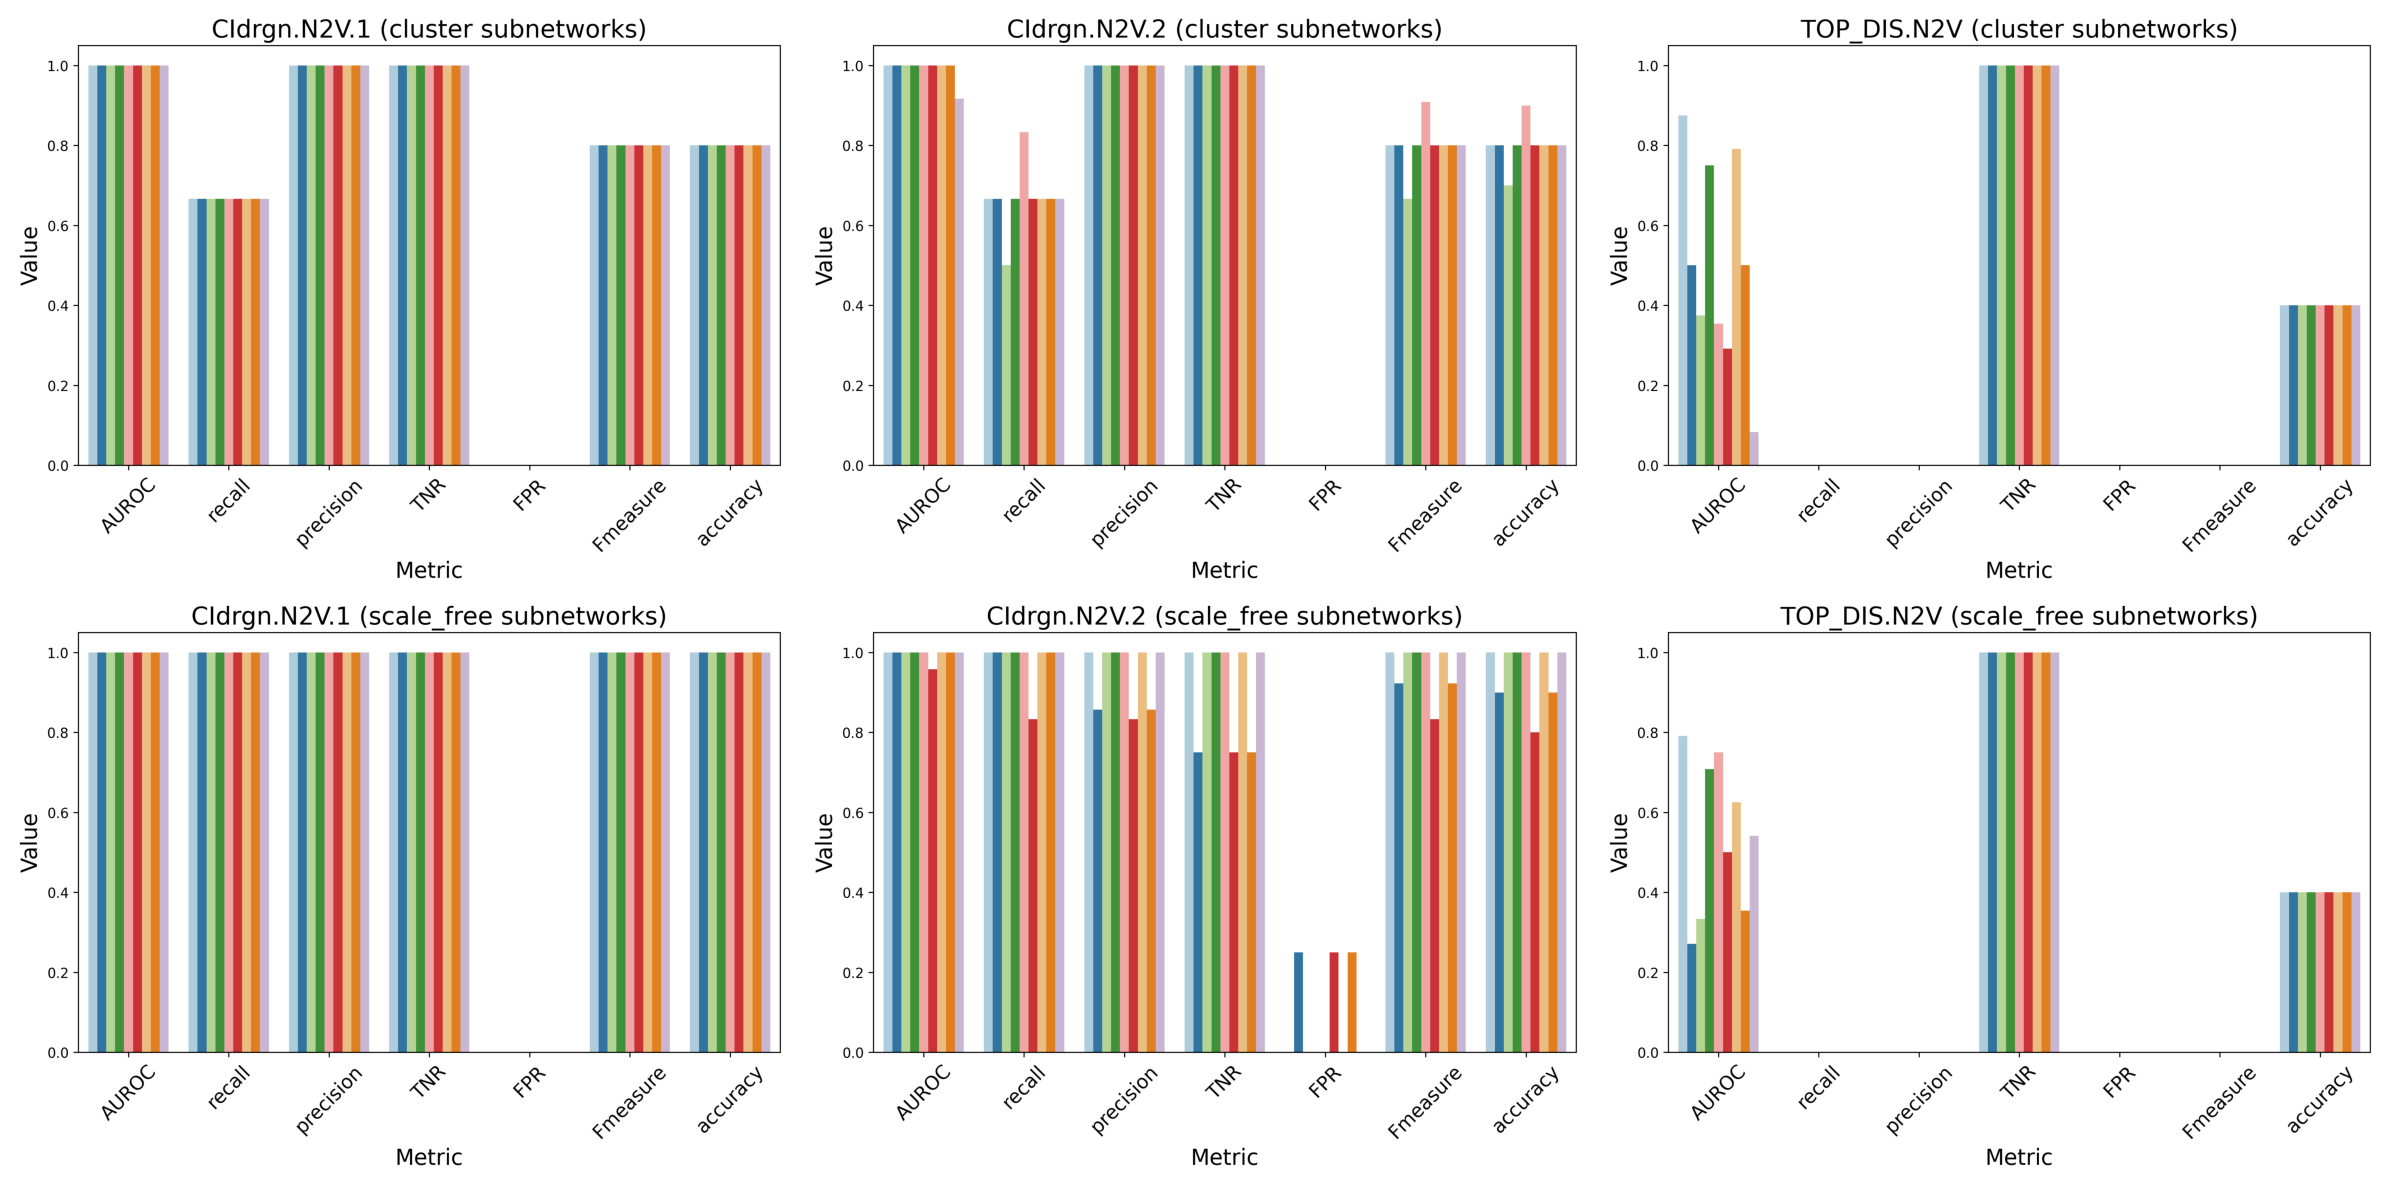

In [246]:
# Put the plots together
png_files = [
    "../data/plots/node2vec_params_cidrgn1_node2vec_CLUSTER_p_q.png",
    "../data/plots/node2vec_params_cidrgn2_node2vec_CLUSTER_p_q.png",
    "../data/plots/node2vec_params_topological_dissimilarity_node2vec_CLUSTER_p_q.png",
    "../data/plots/node2vec_params_cidrgn1_node2vec_SCALE_FREE_p_q.png",
    "../data/plots/node2vec_params_cidrgn2_node2vec_SCALE_FREE_p_q.png",
    "../data/plots/node2vec_params_topological_dissimilarity_node2vec_SCALE_FREE_p_q.png",
]

fig, axes = plt.subplots(2, 3, figsize=(24, 12))

for i, ax in enumerate(axes.flat):
    # if i == 2 or i == 5:
    #     ax.axis("off")
    # else:
    img = mpimg.imread(png_files[i])
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.savefig(
    "../data/plots/node2vec_params_combined_grid_p_q.png", format="png", dpi=300
)
plt.show()
plt.close()

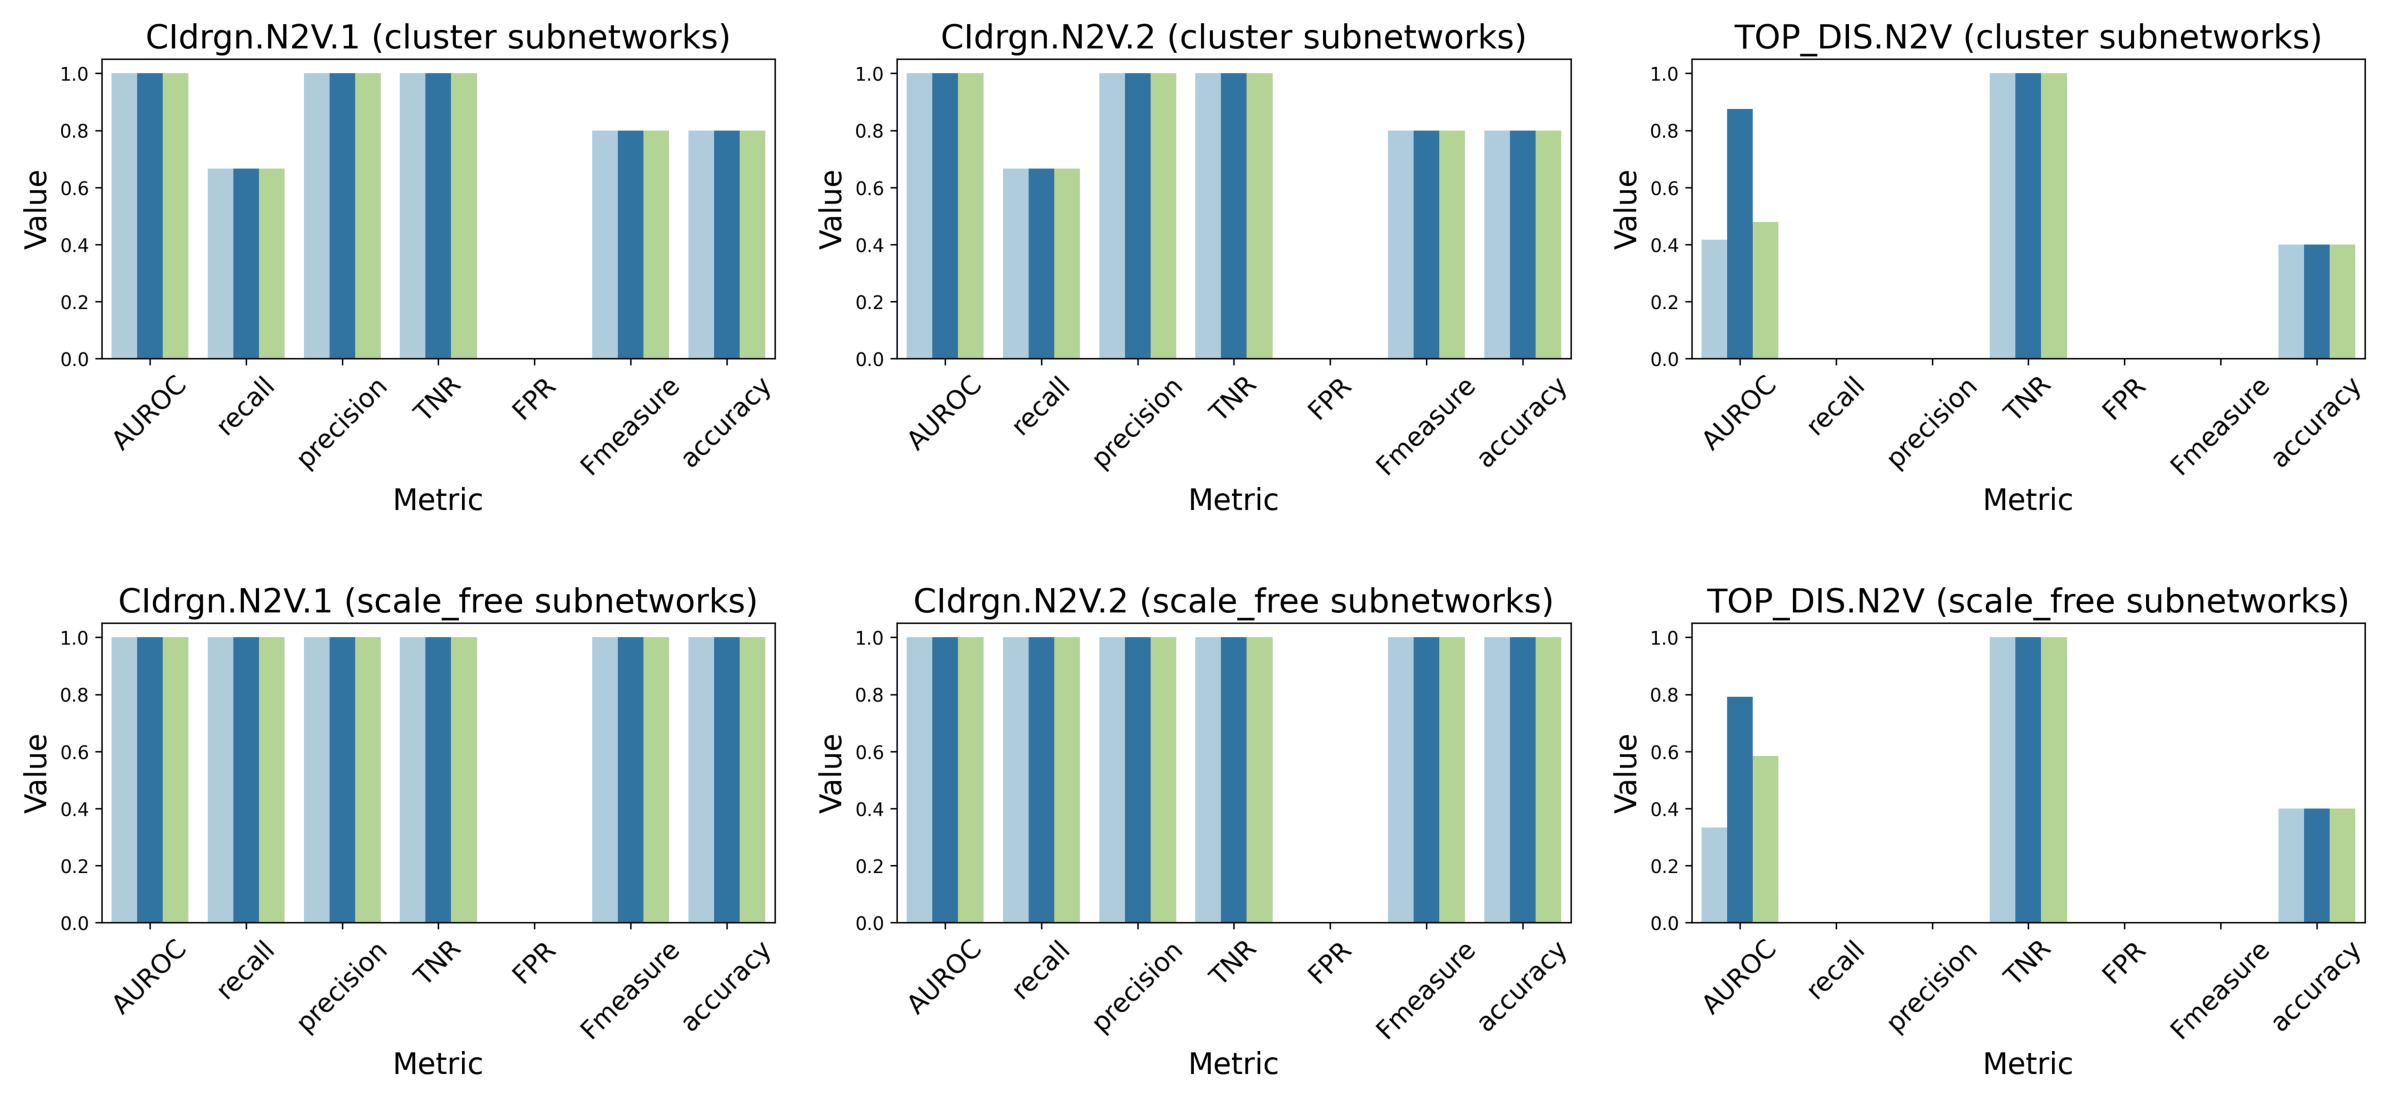

In [247]:
# Put the plots together
png_files = [
    "../data/plots/node2vec_params_cidrgn1_node2vec_CLUSTER_m.png",
    "../data/plots/node2vec_params_cidrgn2_node2vec_CLUSTER_m.png",
    "../data/plots/node2vec_params_topological_dissimilarity_node2vec_CLUSTER_m.png",
    "../data/plots/node2vec_params_cidrgn1_node2vec_SCALE_FREE_m.png",
    "../data/plots/node2vec_params_cidrgn2_node2vec_SCALE_FREE_m.png",
    "../data/plots/node2vec_params_topological_dissimilarity_node2vec_SCALE_FREE_m.png",
]

fig, axes = plt.subplots(2, 3, figsize=(24, 12))

for i, ax in enumerate(axes.flat):
    img = mpimg.imread(png_files[i])
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.savefig(
    "../data/plots/node2vec_params_combined_grid_m.png", format="png", dpi=300
)
plt.show()
plt.close()

## Comparing statistics

In [248]:
subnetwork_types = [
    SubnetworkType.SCALE_FREE.name,
    SubnetworkType.CLUSTER.name,
    SubnetworkType.HUB.name,
]

for subnetwork_type in subnetwork_types:
    results_folder = f"../data/simulated_data_results/comparing_methods/sim_gt-{subnetwork_type}_subnetworksize-10_numsamples-50"
    all_results_path = f"{results_folder}/all_results.tsv"
    all_results = pd.read_csv(all_results_path, sep="\t", index_col=0)

    metrics = all_results.columns

    # Subset to node2vec related results
    all_results = all_results.loc[
        [
            "sam_gs",
            "gsca",
            "cidrgn1",
            "cidrgn2",
            "cidrgn1_node2vec_p_2_q_2_m_10",
            "cidrgn2_node2vec_p_2_q_2_m_10",
            "regulatory_dissimilarity",
            "topological_dissimilarity",
            "adjusted_regulatory_dissimilarity",
            "topological_dissimilarity_node2vec_p_2_q_2_m_10",
            "adjusted_regulatory_dissimilarity_node2vec_p_2_q_2_m_10",
        ],
        :,
    ]

    def get_method_name(method):
        if method == "cidrgn1_node2vec_p_2_q_2_m_10":
            method_name = "CIdrgn.N2V.1"
        elif method == "cidrgn2_node2vec_p_2_q_2_m_10":
            method_name = "CIdrgn.N2V.2"
        elif method == "cidrgn1":
            method_name = "CIdrgn.1"
        elif method == "cidrgn2":
            method_name = "CIdrgn.2"
        elif method == "sam_gs":
            method_name = "SAM_GS"
        elif method == "gsca":
            method_name = "GSCA"
        else:
            method_name = ""
        return method_name

    def get_method_type(method):
        if method == "sam_gs" or method == "gsca":
            return "basic"
        elif "N2V" in method:
            return "CIdrgn+node2vec"
        else:
            return "CIdrgn"

    all_results["method_name"] = all_results.index.map(get_method_name)
    all_results["stat_type"] = all_results.index.map(get_method_type)
    all_results = all_results[all_results["method_name"] != ""]

    metrics = list(all_results.columns)[4:]

    plot_data = all_results.melt(
        id_vars=["method_name", "stat_type"],
        var_name="metric",
        value_name="value",
    )

    # Plot specific metrics
    plot_data = plot_data[plot_data["metric"].isin(metrics)]

    plt.figure(figsize=(6, 4))
    sns.barplot(
        data=plot_data,
        x="metric",
        y="value",
        hue="method_name",
        palette="Paired",
        dodge=True,
    )
    plt.title(
        f"{subnetwork_type.lower()} subnetworks", fontsize=18
    )

    plt.xlabel("Metric", fontsize=16)
    plt.ylabel("Value", fontsize=16)
    plt.xticks(rotation=45, fontsize=14)
    plt.tight_layout()
    # plt.legend(
    #     title="Method", fontsize=14, loc="lower right", bbox_to_anchor=(1.5, 1)
    # )
    plt.legend([], [], frameon=False)  # No legend
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.savefig(f"../data/plots/comparing_methods_{subnetwork_type}.png", format="png", dpi=300, bbox_inches="tight")
    # plt.show()
    plt.close()

    legend_fig = plt.figure(figsize=(4, 2))
    legend_ax = legend_fig.add_subplot(111)
    legend_ax.axis("off")  # Remove axes
    legend = legend_ax.legend(
        handles,
        labels,
        loc="center",
        title="",
        fontsize=14,
        title_fontsize=16,
        frameon=False,
        ncol=3,
    )
    legend_fig.savefig(
        f"../data/plots/comparing_methods_{subnetwork_type}_legend.png",
        dpi=300,
        format="png",
        bbox_inches="tight",
    )
    plt.close()

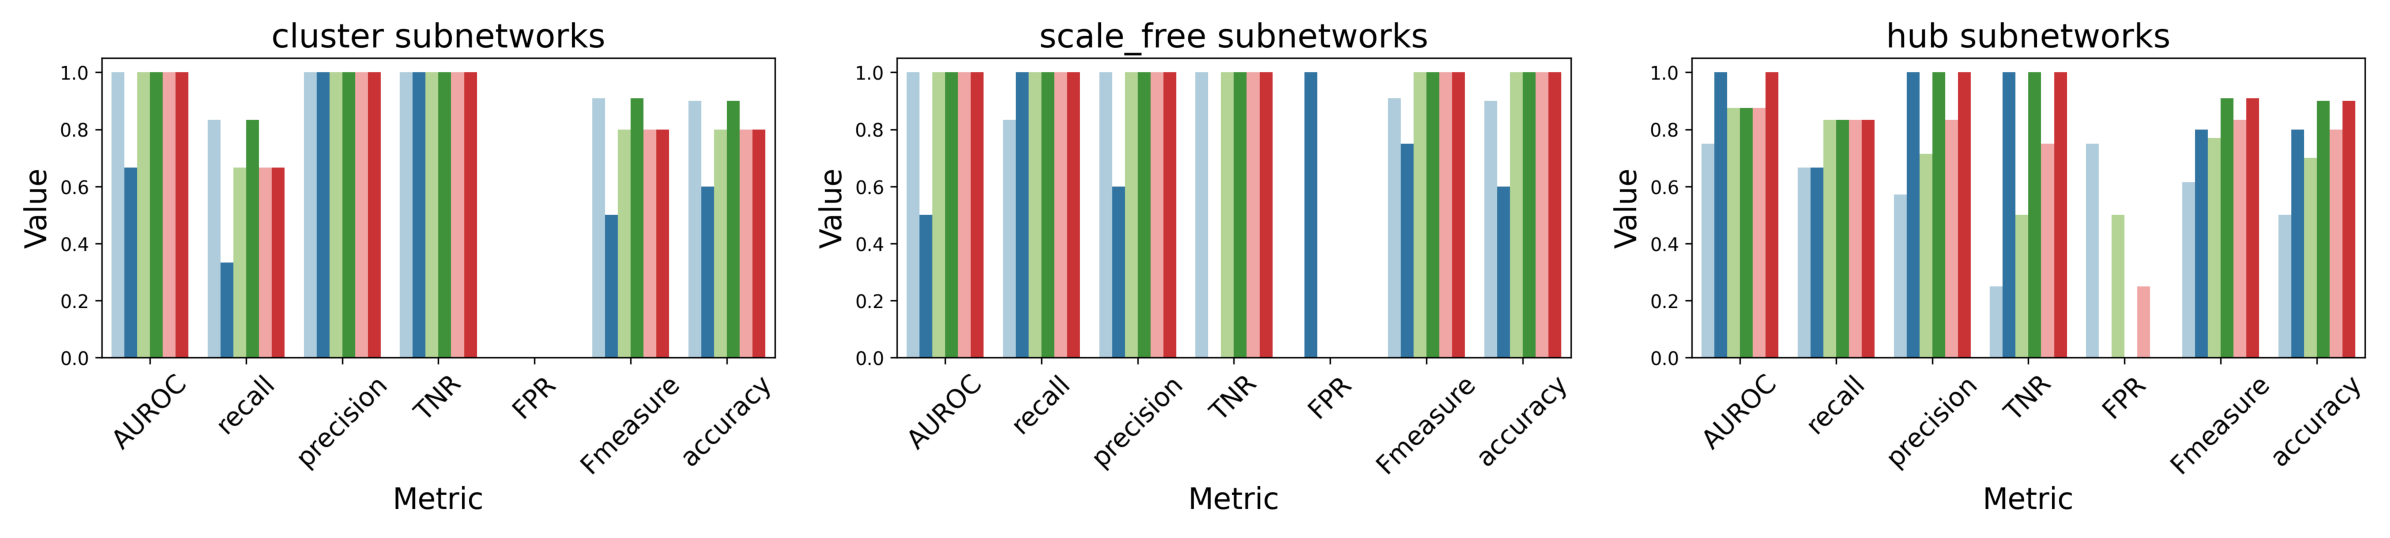

In [249]:
# Put the plots together
png_files = [
    "../data/plots/comparing_methods_CLUSTER.png",
    "../data/plots/comparing_methods_SCALE_FREE.png",
    "../data/plots/comparing_methods_HUB.png",
    # "../data/plots/comparing_methods_CLUSTER_legend.png",
]

fig, axes = plt.subplots(1, 3, figsize=(24, 6))

for i, ax in enumerate(axes.flat):
    img = mpimg.imread(png_files[i])
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.savefig("../data/plots/comparing_methods_combined_grid.png", format="png", dpi=300)
plt.show()
plt.close()